In [72]:
import pandas as pd

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/sudarshan-koirala/Logistic-Regression-Social-Network-Ads/master/Social_Network_Ads.csv")

In [74]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [75]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [76]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [77]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0


In [78]:
X = df.iloc[:,1:4].values
y = df.iloc[:, 4].values

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


In [81]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [82]:
y_proba = log_reg.predict_proba(X_test)

In [83]:
X_test[1:6]

array([[-0.98019606, -0.01254409, -0.5677824 ],
       [ 1.02020406, -0.30964085,  0.1570462 ],
       [-0.98019606, -0.80480212,  0.27301877],
       [-0.98019606, -0.30964085, -0.5677824 ],
       [ 1.02020406, -1.10189888, -1.43757673]])

In [84]:
log_reg.predict([[1,30,30000]])

array([1], dtype=int64)

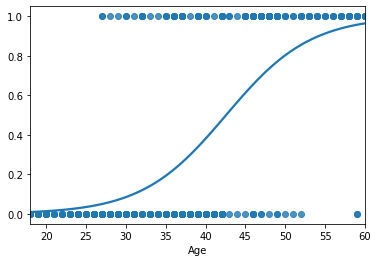

In [85]:
import seaborn as sns
sns.regplot(x=df[['Age']], y=y, data=df, logistic=True, ci=None)

In [86]:
model = LogisticRegression(multi_class='ovr')
model.fit(X, y)
yhat = model.predict(X_test)

In [87]:
yhat

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [88]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(X, y)
yhat = ovr.predict(X_test)

In [89]:
yhat

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [94]:
# from sklearn.datasets import make_classification
# from sklearn.svm import SVC
# # X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# model = SVC(decision_function_shape='ovo')
# model.fit(X, y)
# yhat = model.predict(X_test)

In [95]:
yhat

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [96]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

model = LogisticRegression()
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(X, y)
yhat = ovo.predict(X_test)

In [93]:
yhat

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)